In [6]:
#### Add needed imports
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
import os
#Read data
proccessed_data_path =os.path.join(os.path.pardir,os.path.pardir,'data','processed')
train_path = os.path.join(proccessed_data_path,'dataset2.csv')
df = pd.read_csv(train_path)
labels=df['Churn']
x = df.drop(columns=['Churn','Unnamed: 0'],axis = 'columns')
y=np.ravel(labels)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
oversample = SMOTENC(categorical_features=[ 1,2,4,5,6,7,8,9,10,11,12,13,14,15,18])
x_train, y_train = oversample.fit_resample(x_train, y_train)

sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [3]:
svm_model = svm.SVC(random_state=0,gamma='auto')
rf_model=RandomForestClassifier(random_state=0)
dt_model=DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth = 7,min_samples_leaf=30) 
lr_model= LogisticRegression(random_state=0, max_iter=300)
mlp_model =MLPClassifier(random_state=0,activation='relu', solver='sgd',learning_rate='adaptive')
xgb_model = XGBClassifier(random_state=0 ,learning_rate=0.05, max_depth=7,eval_metric='mlogloss',use_label_encoder =False)
gmb_model= GradientBoostingClassifier(random_state=0,n_estimators=20,learning_rate=0.75,max_features=4,max_depth=5)

model_params = {
    'svm': {
        'model': svm_model,
        'params' : {
            'C': [15,10],
            'kernel': ['rbf','linear']
        }  
     },
    'rf': {
        'model': rf_model,
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
     'dt': {
        'model': dt_model,
        'params' : {}
    },
    'lr' : {
        'model':lr_model,
        'params': {
            'C': [1,5,10]
        }
    },
    'mlp' : {
        'model':mlp_model,
        'params': {}
    },
    'xg_boost' : {
        'model':xgb_model,
        'params': {}
    },
    'gbm' : {
        'model':gmb_model,
        'params': {}
    }
}

In [4]:
scores = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(x_train,y_train)
    conf_matrix =confusion_matrix(y_test,clf.predict(x_test))
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'precision':precision_score(y_test,clf.predict(x_test)),
        'recall':recall_score(y_test,clf.predict(x_test)),
        'f1_score':f1_score(y_test,clf.predict(x_test)),
        'true positives':conf_matrix[0][0],
        'true negatives':conf_matrix[1][1],
        'false postives':conf_matrix[0][1],
        'false negatives':conf_matrix[1][0]
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','precision','recall','f1_score','true positives','true negatives','false postives','false negatives','best_params'])
print(df)

C:\Users\ggj\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ggj\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ggj\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ggj\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ggj\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perc

      model  best_score  precision    recall  f1_score  true positives  \
0       svm    0.824021   0.572932  0.645763  0.607171            1239   
1        rf    0.840912   0.583166  0.493220  0.534435            1315   
2        dt    0.806674   0.517740  0.667797  0.583272            1156   
3        lr    0.796221   0.540127  0.718644  0.616727            1162   
4       mlp    0.802520   0.551957  0.693220  0.614576            1191   
5  xg_boost    0.847668   0.594595  0.633898  0.613618            1268   
6       gbm    0.831143   0.560185  0.615254  0.586430            1238   

   true negatives  false postives  false negatives                 best_params  
0             381             284              209  {'C': 15, 'kernel': 'rbf'}  
1             291             208              299        {'n_estimators': 10}  
2             394             367              196                          {}  
3             424             361              166                    {'C': 5}  
4 

SHAP

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:57:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


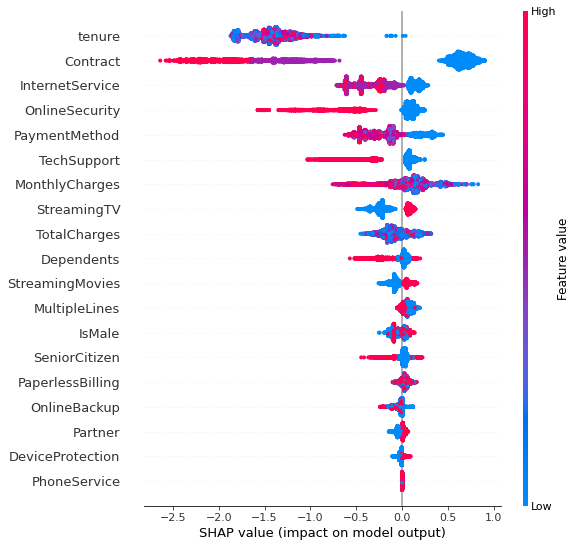

In [5]:
import shap
xgb_model = XGBClassifier(random_state=0 ,learning_rate=0.05, max_depth=7,eval_metric='mlogloss',use_label_encoder =False)
xgb_model.fit(x_train,y_train)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x)